<a href="https://colab.research.google.com/github/sidSha22/ML_projects/blob/main/Teacher_Recommendation_Using_Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/student_feedback.csv')
dataset = dataset.drop(dataset.columns[[0, 1]], axis = 1)

In [ ]:
#number of rows and columns in the dataset
dataset.shape

(1001, 8)

In [ ]:
#First 5 rows of the dataset
dataset.head()

,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,5,2,7,6,9,2,1,8
1,6,5,8,6,2,1,2,9
2,7,7,6,5,4,2,3,1
3,9,6,7,1,5,9,4,6
4,8,10,8,4,6,6,9,9


In [ ]:
#checking for any missing values
dataset.isnull().sum()

,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


Data Analysis and Visualization

In [ ]:
#Statistical measures of the dataset
dataset.describe()

,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


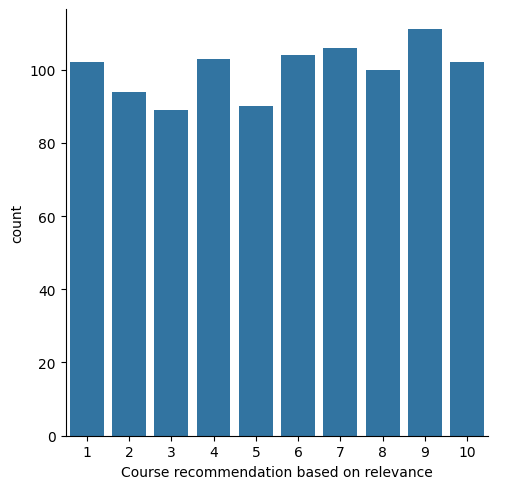

In [ ]:
#Number of values for each Course Recommendation
sns.catplot(x='Course recommendation based on relevance', data=dataset, kind='count')

In [ ]:
#Finding the correlations
correlation = dataset.corr()

<Axes: >

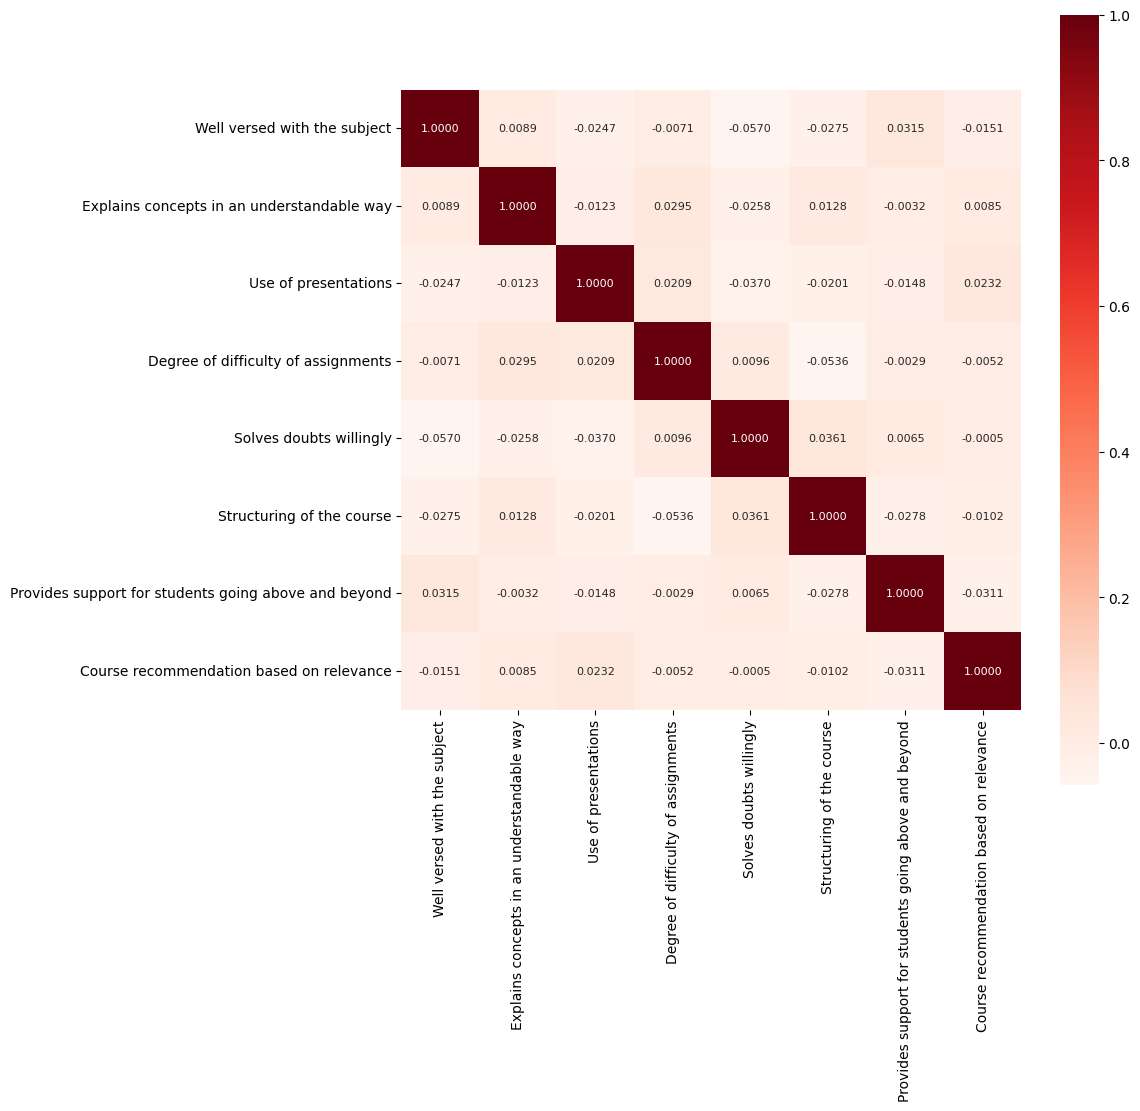

In [ ]:
#Constructing a heatmap to understand the correlation among columns
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.4f', annot=True, annot_kws={'size':8}, cmap='Reds')

Data Preprocessing

In [ ]:
X = dataset.drop('Course recommendation based on relevance', axis=1)

In [ ]:
print(X)

      Well versed with the subject  \
0                                5   
1                                6   
2                                7   
3                                9   
4                                8   
...                            ...   
996                              8   
997                              5   
998                              9   
999                             10   
1000                             7   

      Explains concepts in an understandable way  Use of presentations  \
0                                              2                     7   
1                                              5                     8   
2                                              7                     6   
3                                              6                     7   
4                                             10                     8   
...                                          ...                   ...   
996                      

Data Binarization

In [ ]:
y = dataset['Course recommendation based on relevance'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [ ]:
print(y)

0       1
1       1
2       0
3       0
4       1
       ..
996     1
997     0
998     0
999     0
1000    1
Name: Course recommendation based on relevance, Length: 1001, dtype: int64


Splitting the dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(1001,) (800,) (201,)


Training the model: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [ ]:
print("Accuracy: {:.2f}%".format(test_data_accuracy * 100))

Accuracy: 53.73%


Building a Predictive System

In [ ]:
input_data = (9,9,8,6,8,4,8)

#Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshaping the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 1):
  print("The teacher is recommended.")
else:
  print("The teacher is not recommmended.")

[0]
The teacher is not recommmended.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
